In [1]:
import CVFunctions as cv
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

# load template images
filenames = os.listdir('validationset')

images = []
for filename in filenames:
    if filename[-4:] == '.jpg':
        images.append(cv2.imread('validationset/' + filename,0))

[[ 17.  21.  17. ...,  20.  18.  23.]
 [ 17.  23.  21. ...,  29.  30.  27.]
 [ 24.  28.  27. ...,  32.  30.  29.]
 ..., 
 [ 44.  43.  53. ...,  35.  45.  36.]
 [ 58.  37.  43. ...,  46.  54.  35.]
 [ 63.  28.  18. ...,  39.  38.  25.]]


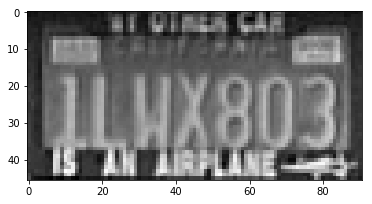

In [2]:
img_data = np.zeros((len(images),46,91))

for i in range(len(images)):
    img_data[i,:,:] = cv2.resize(images[i],(91,46))[:,:]
    

print img_data[0]
cv.draw(img_data[0])

0.33104527055
0.414844431697
0.251459906985
0.491464923689
0.520496363354
0.789905540565
0.565445909693
0.373250988268
0.323765635119
0.574073131425
0.415287311061
0.564543184705
0.32418130047
0.852326160014
0.69775763124
0.548826779384
0.520137001635
0.867707971661
0.78690587846
0.542317663611
0.764923225712
0.493748404537
0.787024983493
0.279814082237
0.444855722104
0.740519298159
0.575681503255
0.685359495657
0.751862841284
0.654264324744
0.580171265655
0.623881504143
0.689635471823
0.54014072218
0.60665117944
0.710206330612
0.571516025005
0.694008977293
0.688284174833
0.809896203486
0.758696548314
0.644587437605
0.782729114629
0.910419508583
0.61081717866
0.794794632224
0.803676092182
0.438216907359
0.864632719505
0.695102494135
0.505596290533
0.548439542553
0.723712996151
0.399770320894
0.480371065162
0.652775488917
0.719015170383
0.901378945645
0.913238956344
0.782765706155
0.713596403823
0.519886166947
0.676030289389
0.821465052843
0.43888124299
0.485285977748
0.739828464113
0.6

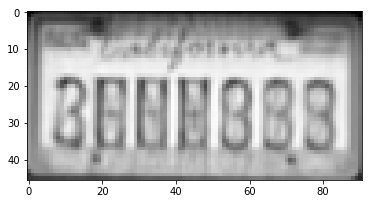

In [7]:

img_sum = np.zeros((46,91))
for img in img_data:
    img_sum += img
img_avg = np.divide(img_sum,126.0)
cv.draw(img_avg)

#cv.draw(np.divide(img_avg.astype(float),255))

#print np.divide(img_avg.astype(float),255)
#for img in img_data:
    #print cv.J(img,img_avg)
    
for a in img_data:
    maxJ = 0
    for b in img_data:
        J = cv.J(a,b)
        if J > maxJ:
            maxJ = J
    print maxJ


In [18]:
def LoadMNIST(filename):
    '''Written by GSY'''
    with open(filename, 'rb') as f:
        header = bytearray(f.read(4)) #read the header bytes
        datatype = 'int32'  
        typecode = header[2] # read the type byte
        if(typecode==8):
            datatype = '>u1';
        elif(typecode == 12):
            datatype = '>f4'
        elif(typecode == 14):
            datatype = '>f8'    
        #print datatype
        
        size = np.fromfile(f, '>i4', header[3]) #read the dimensions of the array  
        dshape = ()
        count = 1
        for d in range(0,len(size)):
            count *= size[d]
            dshape += (size[d], )        
        #print dshape
        data = np.fromfile(f, datatype, count) #read the array data
        return data.reshape(dshape)

In [ ]:
mnist_trn_data = LoadMNIST(mnist_trn_img).astype(np.float32)[:,np.newaxis,:,:]
mnist_val_data = LoadMNIST(mnist_val_img).astype(np.float32)[:,np.newaxis,:,:]
mnist_trn_label = LoadMNIST(mnist_trn_lab)
mnist_val_label = LoadMNIST(mnist_val_lab)